<a href="https://colab.research.google.com/github/aisyahaini/MachineLearning/blob/main/XAI_SHAP_and_LIME_aisyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
redwankarimsony_heart_disease_data_path = kagglehub.dataset_download('redwankarimsony/heart-disease-data')

print('Data source import complete.')


Data source import complete.


In [178]:
pip install catboost

In [179]:
# import libraries
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier


# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score , mean_absolute_error  , mean_squared_error , r2_score

# to save the model
import pickle

import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [180]:
# Load the dataset
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0


---
# **<font color=" #1abc9c">Exploratory Data Analysis (EDA)</font>**
----

### Exploring each Column

In [181]:
# exploring datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [182]:
# Check the shape of data
df.shape

(920, 16)

----
### **<font color=" #1abc9c">Dealing With Id Column</font>**
---

In [183]:
# Id Column
df['id'].describe()

count    920.000000
mean     460.500000
std      265.725422
min        1.000000
25%      230.750000
50%      460.500000
75%      690.250000
max      920.000000
Name: id, dtype: float64

- By Seeing the Id column , the total number of people in this datset are 920.


---
## **<font color=" #1abc9c">Dealing With Age Column</font>**
---

In [184]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

- The Average Age is 53.

<Axes: xlabel='age', ylabel='Count'>

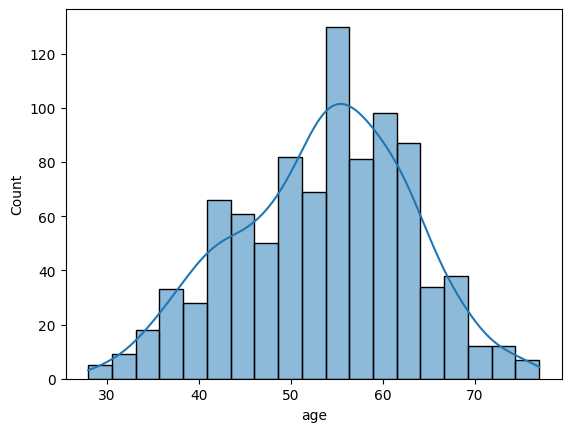

In [185]:
sns.histplot(df['age'],kde=True)

Mean:  53.51086956521739
Mode:  54
Median:  54.0


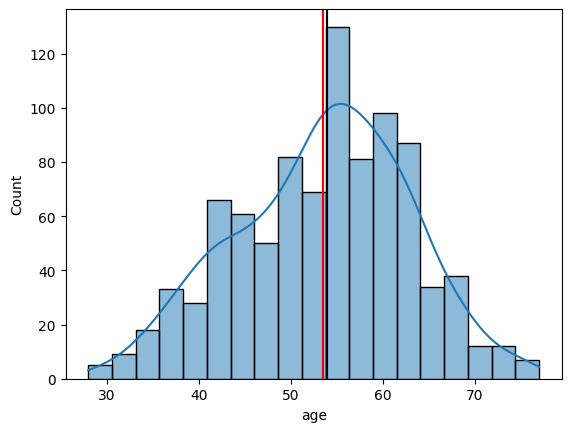

In [186]:
# Check mean,median and mode of age column
Mean = df['age'].mean()
Mode = df['age'].mode()[0]
Median = df['age'].median()
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].mode()[0],color='blue')
plt.axvline(df['age'].median(),color='black')

print('Mean: ', Mean)
print('Mode: ', Mode)
print('Median: ', Median)

In [187]:
# Lets explore the age column based on gender

fig = px.histogram(data_frame=df,x='age',color='sex')
fig.show()

**_Observation_**:
- 22 Females are in the range of 54 - 55.
- 70 Males are in the range of 54 - 55.
- So according to this dataset , Males are getting heart disease more than females



---
## **<font color=" #1abc9c">Dealing With Sex Column</font>**
---

In [188]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [189]:
# Lets calculate male and female percentage
Male_count = 726
Female_count = 194

# Check male percentage
Male_Per = (Male_count/920)*100
Female_Per = (Female_count/920) * 100

print("The percentage of Male having heart disease are:",Male_Per)
print("The percentage of Female having heart disease are:",Female_Per)

The percentage of Male having heart disease are: 78.91304347826087
The percentage of Female having heart disease are: 21.086956521739133


In [190]:
# Find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

**_Observations_:**
- Males are 726 , Females are 194.
- Percentage of Males in this dataset are 78.91.
- Percentage of Females in this dataset are 21.08.
- Males are 274% more in this dataset than Females.


---
## **<font color=" #1abc9c">Dealing With Dataset Column</font>**
---

In [191]:
# Lets deal with dataset Column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [192]:
# Find unique values count in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [193]:
# lets check the dataset column with respect with sex column
fig = px.histogram(data_frame=df,x='age',color='dataset')
fig.show()

# lets find the mean , median and mode of age column with respect to dataset column
print(df.groupby('dataset')['age'].mean())
print('----------------------------------')
print(df.groupby('dataset')['age'].median())
print('----------------------------------')
print(df.groupby('dataset')['age'].agg(pd.Series.mode))


dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [194]:
# make piechat of dataset column
fig = px.sunburst(df,path=['dataset','sex'])
fig.show()


---
## **<font color=" #1abc9c">Dealing With CP (Chest Pain) Column</font>**
---

**Asymptomatic:**
*Asymptomatic* means that individuals do not exhibit the typical symptoms associated with heart problems, such as chest pain.

**Non-Anginal Chest Pain:**
*Non-anginal* chest pain refers to discomfort that deviates from the typical pattern of angina. It may not be triggered by physical activity and can have various characteristics.

**Atypical Angina:**
*Atypical angina* maintains a connection to the heart but diverges from the classic symptoms commonly associated with typical angina. It may have different qualities compared to the usual anginal pain.

**Angina and Heart Disease:**
*Angina* is closely entwined with heart disease. It serves as a symptom, signaling an underlying issue with the blood supply to the heart. Typically associated with coronary artery disease (CAD), angina indicates a potential lack of oxygen and nutrients reaching the heart muscle, urging individuals to seek prompt medical attention.

In [195]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [196]:
fig = px.sunburst(df,path=['dataset','cp'])
fig.show()

In [197]:
# Draw the plot of age column groupby by cp column
fig = px.histogram(data_frame=df,x='age',color='cp')
fig.show()


<Axes: xlabel='cp', ylabel='count'>

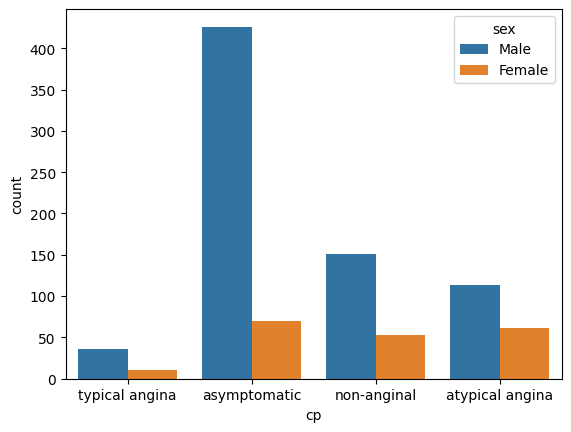

In [198]:
# count plot of cp column by sex
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

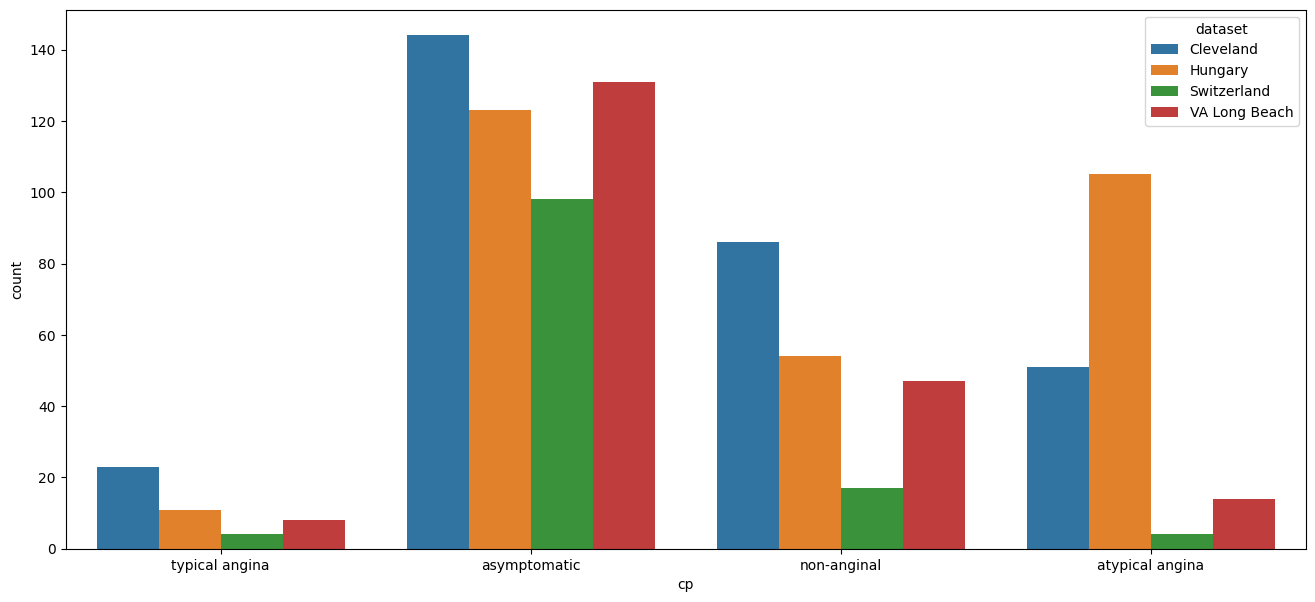

In [199]:
# Draw the plot of cp column with respect to dataset
plt.figure(figsize=(16,7))
sns.countplot(df,x='cp',hue='dataset')


---
## **<font color=" #1abc9c">Dealing With Trestbps Column</font>**
---

- The normal resting blood pressure is 120/80 mm Hg.

In [200]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [201]:
df['trestbps'].min()

0.0

- It is impossible to have a blood pressure at 0. So we are going to deal with this value and replacing it wiht null values.

In [202]:
df = df[df['trestbps'] != 0]

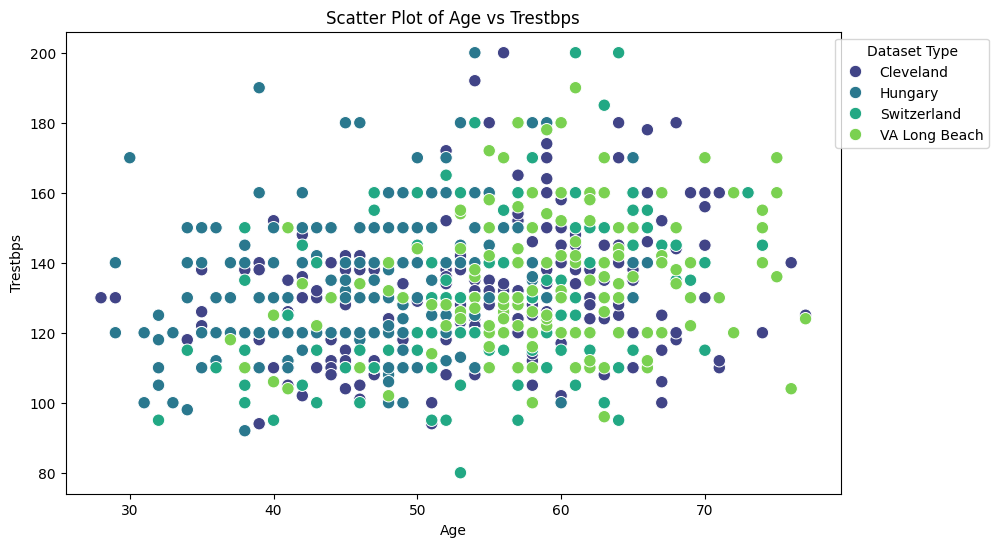

In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='trestbps', hue='dataset', palette='viridis', s=80)

plt.title('Scatter Plot of Age vs Trestbps')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.legend(title='Dataset Type', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

<Axes: xlabel='trestbps', ylabel='Count'>

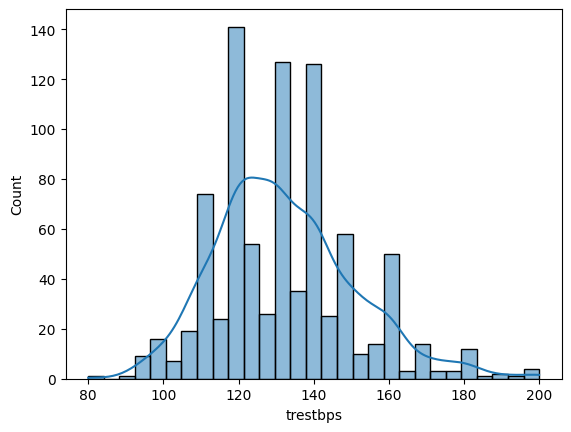

In [204]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

> _Observation._
- The Range of blood pressure is now between 80 - 200. Which is possible.


---
## **<font color=" #1abc9c">Exploring chol , fbs, restecg, thalch, exang, oldpeak, slope, ca, thal</font>**
---


In [205]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [206]:
df['restecg'] = df['restecg'].str.replace('-', '')

In [207]:
# Define the columns you want to explore
columns_to_explore = ['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Display datatype, value counts, and other insights for each column
for column in columns_to_explore:
    print(f"Column: {column}")
    print(f"Datatype: {df[column].dtype}")
    print(f"Value Counts:\n{df[column].value_counts()}\n")
    print(f"Number of unique values: {df[column].nunique()}")
    if df[column].dtype == 'object':
        print(f"Top value: {df[column].mode()[0]}")
    else:
        print(f"Mean: {df[column].mean()}")
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
    print("-" * 50)

# Additional insights (mean, min, max, etc.) for numerical columns
numerical_columns = ['chol', 'trestbps', 'thalch', 'oldpeak', 'ca']

print("Additional insights for numerical columns:")
print(df[numerical_columns].describe())

# Additional insights for categorical columns
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']

print("\nAdditional insights for categorical columns:")
for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].unique()}")
    print("-" * 50)



Column: chol
Datatype: float64
Value Counts:
chol
0.0      171
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

Number of unique values: 217
Mean: 199.35433070866142
Min: 0.0
Max: 603.0
--------------------------------------------------
Column: fbs
Datatype: object
Value Counts:
fbs
False    691
True     138
Name: count, dtype: int64

Number of unique values: 2
Top value: False
--------------------------------------------------
Column: restecg
Datatype: object
Value Counts:
restecg
normal             550
lv hypertrophy     188
stt abnormality    179
Name: count, dtype: int64

Number of unique values: 3
Top value: normal
--------------------------------------------------
Column: thalch
Datatype: float64
Value Counts:
thalch
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
195.0     1
91.0      1
87.0      1
192.0     1
73.0      1
Name: count, L

> _**Observations**_

- If the `ca` value is 0, it means there are no significant problems in the major blood vessels. It's like saying everything looks good in terms of how blood is flowing through the big arteries in the heart.

- The `thalch` variable typically represents the maximum heart rate achieved during exercise. If it's 60, it is the lowest number, indicating correct information.

- Cholesterol is an essential component of cell membranes and a precursor for certain hormones, so having a cholesterol level of exactly 0 is not consistent with normal physiological functioning. It's very rare and almost impossible.

- Need to impute Cholesterol.
- According to my observation, there is no need to remove zeros in `ca Column` because it makes sense to the data.


---
# **<font color=" #1abc9c">Lets Deal With Missing Values</font>**
---


We are going to define a function to impute missing values (Categorical / Continuous)

In [208]:
# Again check the missing values
df.isnull().sum().sort_values(ascending=False)

ca          610
thal        485
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [209]:
# lets deal with thal column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.376496
thal        52.774755
slope       33.623504
fbs          9.793254
oldpeak      6.746464
trestbps     6.420022
thalch       5.984766
exang        5.984766
chol         3.264418
restecg      0.217628
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [210]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [211]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

**This function imputes missing values in Categorical columns**

*  `Step 1:` Separate rows with missing and non-missing values for the target column
*  `Step 2:` Extract features (X) and target variable (y) for non-missing values
*  `Step 3:` Extract other missing columns for later imputation
*  `Step 4:` Encode categorical columns using LabelEncoder
*  `Step 5:` Encode the target column if it is a boolean type
*  `Step 6:` Initialize IterativeImputer with RandomForestRegressor as the estimator
*  `Step 7:` Impute other missing columns in the dataset
*  `Step 8:` Split the data into training and testing sets
*  `Step 9:` Train a RandomForestClassifier to predict missing values in the target column
*  `Step 10:` Predict missing values and calculate accuracy
*  `Step 11:` Prepare the dataset with missing values for the final imputation
*  `Step 12:` Impute missing values in the target column for the original missing data
*  `Step 13:` Predict missing values in the target column
*  `Step 14:` Combine the imputed data with the original dataset


**This function imputes missing values in continuous columns**
  
*  `Step 1:` Separate rows with missing and non-missing values for the target column
*  `Step 2:` Extract features (X) and target variable (y) for non-missing values
*  `Step 3:` Extract other missing columns for later imputation
*  `Step 4:` Encode categorical columns using LabelEncoder
*  `Step 5: `Initialize IterativeImputer with RandomForestRegressor as the estimator
*  `Step 6:` Impute other missing columns in the dataset
*  `Step 7:` Split the data into training and testing sets
*  `Step 8:` Train a RandomForestRegressor to predict missing values in the target column
* ` Step 9:` Predict missing values and calculate performance metrics


In [212]:
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [213]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          610
thal        485
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [214]:
def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred), "\n") # removed squared=False
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [215]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          610
thal        485
num           0
dtype: int64


---
# **<font color=" #1abc9c">Lets Deal With Outliers Values</font>**
---


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  860 non-null    float64
 6   chol      889 non-null    float64
 7   fbs       829 non-null    object 
 8   restecg   917 non-null    object 
 9   thalch    864 non-null    float64
 10  exang     864 non-null    object 
 11  oldpeak   857 non-null    float64
 12  slope     610 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [217]:
import pandas as pd
from scipy import stats

# Sample DataFrame
# Assume your DataFrame is named 'df'
# df = ...

# Define the columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Define a Z-score threshold for outlier detection (you can adjust this threshold)
z_score_threshold = 2.8

# Identify outliers using the threshold
outliers = (z_scores > z_score_threshold).any(axis=1)

# Display the rows containing outliers
print("Rows with outliers:")
print(df[outliers])

# Remove outliers
df = df[~outliers]

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(df.head(5))


Rows with outliers:
Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []

DataFrame without outliers:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upslopi

In [218]:
# creating box plots to visulize the columns havon no outliers
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()
fig = px.box(data_frame=df, y='ca')
fig.show()

In [219]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame

# Scatter plot for thalch and oldpeak
fig1 = px.scatter(df, x='thalch', y='oldpeak', title='Scatter Plot: thalch vs oldpeak')

# Box plot for restecg and thalch
fig2 = px.box(df, x='restecg', y='thalch', title='Box Plot: thalch vs restecg')

# Violin plot for slope and thalch
fig3 = px.violin(df, x='slope', y='thalch', title='Violin Plot: thalch vs slope')

# Histogram for ca
fig4 = px.histogram(df, x='ca', title='Histogram: ca')

# Bar plot for fbs
fig5 = px.bar(df, x='fbs', title='Bar Plot: fbs')

# Pie chart for exang
fig6 = px.pie(df, names='exang', title='Pie Chart: exang')

# Display the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()


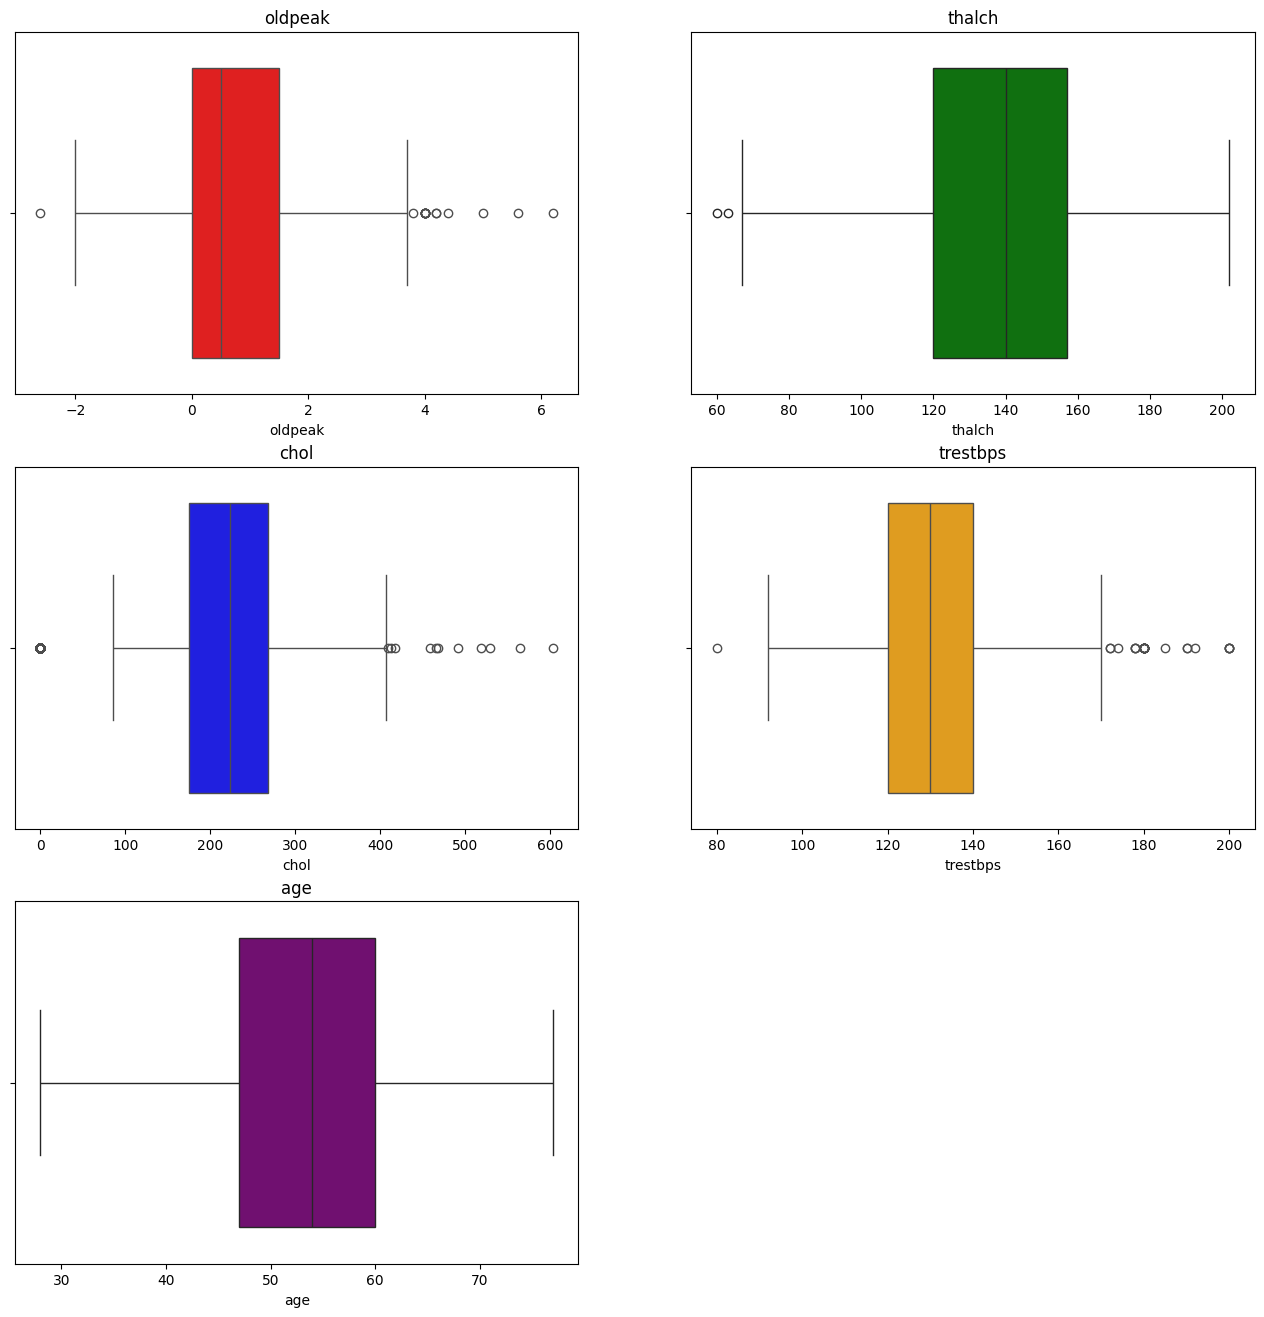

In [220]:
plt.figure(figsize=(16,16))

color = ['red','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=color[i])
    plt.title(col)

plt.show()


---
# **<font color=" #1abc9c">Visualize data to get more insights</font>**
---


In [221]:
df_pie = df['dataset'].value_counts().reset_index()
df_pie.columns = ['dataset', 'count']
fig7 = px.pie(df_pie, values='count', names='dataset')
fig7.show()

In [222]:
# create sunburst plot on titanic dataset
fig = px.sunburst(df,path=['sex','dataset'], values='age' , color='num')
# Show the plot
fig.show()

In [223]:
fig1 = px.scatter(df.dropna(subset=['trestbps']), x='age', y='chol', color='sex', size='trestbps', hover_data=['cp', 'dataset'])
fig1.update_layout(title='Scatter Plot: Age vs Cholesterol (colored by sex, sized by trestbps)')
fig1.show()

In [224]:
fig2 = px.box(df, x='sex', y='thalch', color='sex', points="all", hover_data=['cp', 'dataset'])
fig2.update_layout(title='Box Plot: Thalch distribution by Sex')
fig2.show()

In [225]:
fig3 = px.histogram(df, x='age', color='sex', marginal='box', nbins=20, hover_data=['cp', 'dataset'])
fig3.update_layout(title='Histogram: Age distribution (colored by sex)')
fig3.show()

In [226]:
fig4 = px.bar(df, x='cp', y='num', color='sex', barmode='group', facet_col='dataset',
              category_orders={'cp': ['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']},
              hover_data=['age', 'chol'])
fig4.update_layout(title='Bar Chart: Number of cases by Chest Pain Type (colored by sex)')
fig4.show()

In [227]:
import plotly.express as px

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Scatter plot matrix for 'age', 'trestbps', 'chol', 'thalch', colored by 'sex'
scatter_matrix_sex = px.scatter_matrix(df, dimensions=['age', 'trestbps', 'chol', 'thalch'], color='sex',
                                       title='Scatter Plot Matrix with Gender Color')



# Bar chart for 'fbs' and 'restecg' with 'num' as color
bar_fbs_restecg_num = px.bar(df, x='fbs', color='restecg', facet_col='num', title='Bar Chart for Fasting Blood Sugar and Resting ECG vs Heart Disease')
bar_chol_num = px.bar(df, x='chol', facet_col='num', title='Bar Chart for Cholestrol and Resting ECG vs Heart Disease')

# Display the plots
scatter_matrix_sex.show()
bar_fbs_restecg_num.show()
bar_chol_num.show()


The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are : [0,1,2,3,4] which states that there are 5 types of heart diseases.

- `0 = no heart disease`
- `1 = mild heart disease`
- `2 = moderate heart disease`
- `3 = severe heart disease`
- `4 = critical heart disease`


---
# **<font color=" #1abc9c">Use Machine Learning Models For Predictions</font>**
---


In [228]:
# In some of the features, there is space will will create problem later on.
# So we rename those attributes to handle problems in the future.
df['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
df['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
df['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = df[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((df['num'] > 0)*1).copy()
# Encoding Sex
data_1['sex'] = (df['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (df['fbs'])*1
data_1['exang'] = (df['exang'])*1
# Renaming COlumns Names.
data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'st_slope_type', 'num_major_vessels',
              'thalassemia_type', 'target']
# Load Data Sample
data_1.head()

age  sex  chest_pain_type    country  resting_blood_pressure  cholesterol  \
0   63    1   typical_angina  Cleveland                   145.0        233.0   
1   67    1     asymptomatic  Cleveland                   160.0        286.0   
2   67    1     asymptomatic  Cleveland                   120.0        229.0   
3   37    1      non-anginal  Cleveland                   130.0        250.0   
4   41    0  atypical_angina  Cleveland                   130.0        204.0   

  fasting_blood_sugar                       Restecg  max_heart_rate_achieved  \
0                   1  left_ventricular_hypertrophy                    150.0   
1                   0  left_ventricular_hypertrophy                    108.0   
2                   0  left_ventricular_hypertrophy                    129.0   
3                   0                        normal                    187.0   
4                   0  left_ventricular_hypertrophy                    172.0   

  exercise_induced_angina  st_depression st_slope_type  num_major_vessels  \
0                       0            2.3   downsloping                0.0   
1                       1            1.5          flat                3.0   
2                       1            2.6          flat                2.0   
3                       0            3.5   downsloping                0.0   
4                       0            1.4     upsloping                0.0   

    thalassemia_type  target  
0       fixed_defect       0  
1             normal       1  
2  reversable_defect       1  
3             normal       0  
4             normal       0

## Let make X and y in our Data:

In [229]:
X = data_1.drop('target',axis=1)
y = data_1['target']

# Encode X using data seperate label encoder for all categorical columns
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object'  or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## **Enlist all the models that we will use to predict the heart disease.**
**_Models should be classifiers for multi-class classifications_**:
- logistic regression
- SVM
- KNN
- Gradient Boost Classifier
- Random Forest
- Decision Tree
- NB
- XGBoost
- lightGBM
- CatBoost Classifier

In [230]:
# Define models
models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42, probability=True)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('GaussianNB', GaussianNB()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('XGBClassifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
    ('BaggingClassifier', BaggingClassifier(random_state=42)),
    ('CatBoostClassifier', CatBoostClassifier(random_state=42, verbose=0)),
]


## Train and evaluate models

In [231]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical features
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted for imbalanced data
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Compute confusion matrix for TNR and TPR
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
    tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity)

    # Append metrics
    model_scores.append((name, accuracy, f1, precision, recall, roc_auc, tnr, tpr))

    # Print results
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} F1 Score: {f1:.2f}")
    print(f"{name} Precision: {precision:.2f}")
    print(f"{name} Recall (TPR): {recall:.2f}")
    print(f"{name} True Negative Rate (TNR): {tnr:.2f}")
    print(f"{name} True Positive Rate (TPR): {tpr:.2f}")
    if roc_auc is not None:
        print(f"{name} ROC AUC: {roc_auc:.2f}")
    print("-" * 50)


LogisticRegression Accuracy: 0.77
LogisticRegression F1 Score: 0.77
LogisticRegression Precision: 0.77
LogisticRegression Recall (TPR): 0.77
LogisticRegression True Negative Rate (TNR): 0.75
LogisticRegression True Positive Rate (TPR): 0.79
LogisticRegression ROC AUC: 0.86
--------------------------------------------------
SVM Accuracy: 0.66
SVM F1 Score: 0.67
SVM Precision: 0.67
SVM Recall (TPR): 0.66
SVM True Negative Rate (TNR): 0.67
SVM True Positive Rate (TPR): 0.66
SVM ROC AUC: 0.75
--------------------------------------------------
DecisionTreeClassifier Accuracy: 0.77
DecisionTreeClassifier F1 Score: 0.77
DecisionTreeClassifier Precision: 0.78
DecisionTreeClassifier Recall (TPR): 0.77
DecisionTreeClassifier True Negative Rate (TNR): 0.81
DecisionTreeClassifier True Positive Rate (TPR): 0.74
DecisionTreeClassifier ROC AUC: 0.78
--------------------------------------------------
RandomForestClassifier Accuracy: 0.82
RandomForestClassifier F1 Score: 0.82
RandomForestClassifier Pre

In [232]:
for name, accuracy, f1, *rest in model_scores:
    print(f"{name}: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}")


LogisticRegression: Accuracy = 0.77, F1 Score = 0.77
SVM: Accuracy = 0.66, F1 Score = 0.67
DecisionTreeClassifier: Accuracy = 0.77, F1 Score = 0.77
RandomForestClassifier: Accuracy = 0.82, F1 Score = 0.82
GaussianNB: Accuracy = 0.77, F1 Score = 0.77
KNeighborsClassifier: Accuracy = 0.64, F1 Score = 0.63
GradientBoostingClassifier: Accuracy = 0.80, F1 Score = 0.80
XGBClassifier: Accuracy = 0.80, F1 Score = 0.80
AdaBoostClassifier: Accuracy = 0.82, F1 Score = 0.82
BaggingClassifier: Accuracy = 0.77, F1 Score = 0.77
CatBoostClassifier: Accuracy = 0.80, F1 Score = 0.80


In [233]:
pip install lime

In [234]:
pip install shap

 98%|===================| 180/184 [00:25<00:00]       

SHAP Summary Plot for CatBoostClassifier:


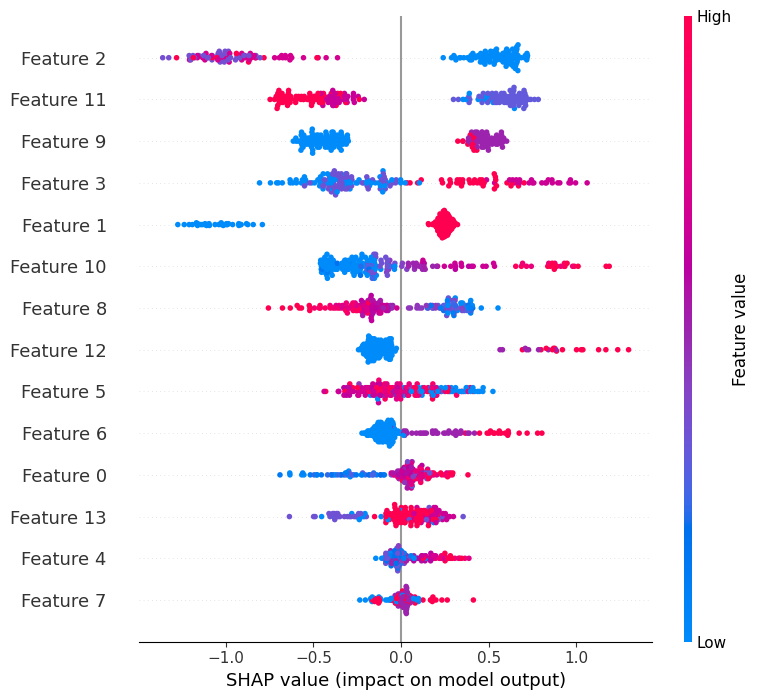

LIME Explanation for CatBoostClassifier (Instance 0):


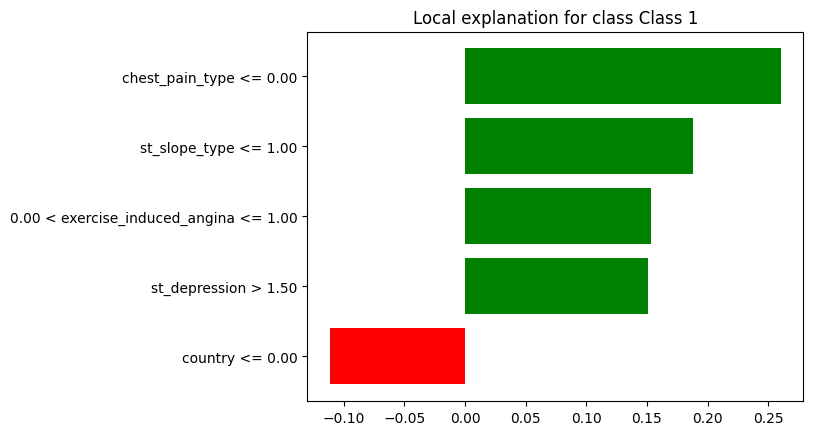

In [235]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Feature evaluation using SHAP
explainer_shap = shap.Explainer(model, X_train)
shap_values = explainer_shap(X_test)
print(f"SHAP Summary Plot for {name}:")
shap.summary_plot(shap_values, X_test)

    # Feature evaluation using LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
training_data=X_train, # Removed np.array conversion
feature_names=X.columns.tolist(), # Use original DataFrame's columns
class_names=["Class 0", "Class 1"],
discretize_continuous=True)

idx = 0  # Choose an instance to explain
exp = explainer_lime.explain_instance(X_test[idx], model.predict_proba, num_features=5) # Changed X_test.iloc to X_test
print(f"LIME Explanation for {name} (Instance {idx}):")
exp.show_in_notebook()
exp.as_pyplot_figure()
plt.show()

Evaluating feature importance using SHAP for AdaBoostClassifier


PermutationExplainer explainer: 185it [01:21,  2.27it/s]


SHAP Summary Plot for AdaBoostClassifier


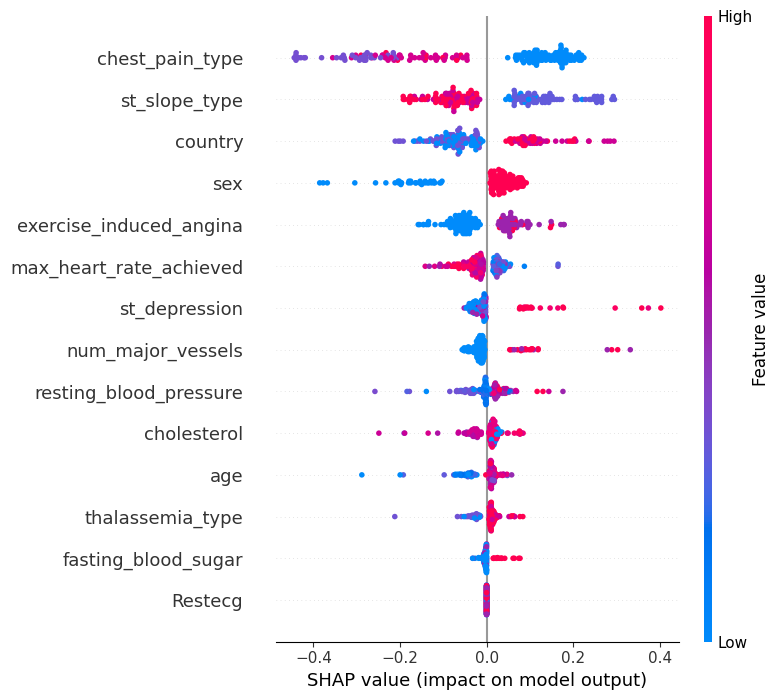

Evaluating feature importance using LIME for AdaBoostClassifier
LIME Explanation for AdaBoostClassifier (Instance 0):


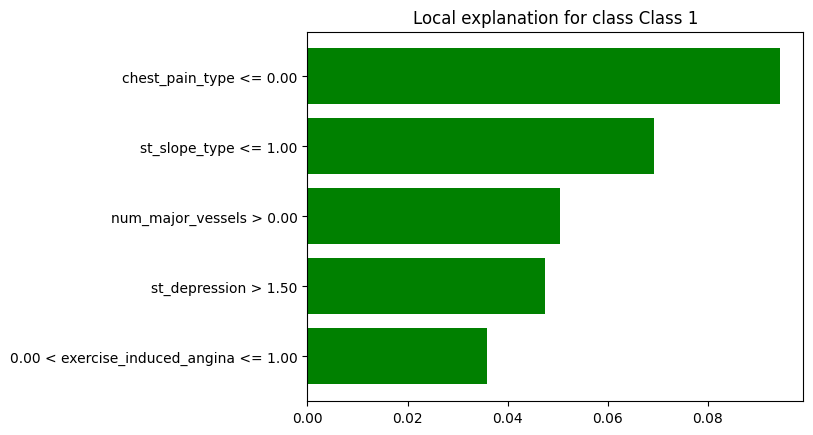

In [239]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

# Get feature names from X
feature_names = X.columns.tolist()

# Ensure X_train and X_test are in DataFrame format
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Initialize the AdaBoost model
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# ======= Evaluation with SHAP =======
print("Evaluating feature importance using SHAP for AdaBoostClassifier")

try:
    explainer_shap = shap.Explainer(model.predict, X_train)  # Fix: Use general Explainer
    shap_values = explainer_shap(X_test)

    print("SHAP Summary Plot for AdaBoostClassifier")
    shap.summary_plot(shap_values, X_test)  # Visualize SHAP
    plt.show()
except Exception as e:
    print(f"SHAP not supported for AdaBoostClassifier: {e}")

# ======= Evaluation with LIME =======
print("Evaluating feature importance using LIME for AdaBoostClassifier")

try:
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.to_numpy(),
        feature_names=X_train.columns.tolist(),
        class_names=["Class 0", "Class 1"],
        discretize_continuous=True
    )

    idx = 0  # Select an instance to explain
    sample_instance = X_test.iloc[idx]

    exp = explainer_lime.explain_instance(sample_instance, model.predict_proba, num_features=5)

    print(f"LIME Explanation for AdaBoostClassifier (Instance {idx}):")
    exp.show_in_notebook()
    exp.as_pyplot_figure()
    plt.show()

except Exception as e:
    print(f"LIME not supported for AdaBoostClassifier: {e}")
